In [ ]:
### This code is a copy of add_noise_to_data.ipynb adapted for HIGH RESOLUTION nn-generated data. 
### The purpose of this code is to minimize the risk of overwriting initial source files that might not be backed up
### In its current version it generates 6 csv files: 3 for tanh, 3 for leaky_ReLU, with 3 realizations of noise.
### The csv files are inputs for codes that compute traces of BMS and that train (other) neural networks.

In [5]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec

In [7]:
function='tanh' #tanh, leaky_ReLU
 
realizations=3 #Noise realization. 0,1,2 unless otherwise specified 
sigma=0.06;mean=0; #sigma from 0 to 0.2 unless otherwise specified.
resolution=0.01
file_model='NN_function_' + function + '_NREP_10_res_' + str(resolution) + '_data.csv'
model_d='../data/' + file_model
d=pd.read_csv(model_d)
d=d.drop(columns='Unnamed: 0')
display(d)d['noise']=noise
d['y_noise']=d['y'] + noise
display(d)

sample=d.index.stop
print(d.index.stop)

noise = np.random.normal(mean,sigma,sample)

,x1,y,rep
0,-4.00,0.000000,0.0
1,-3.99,0.000067,0.0
2,-3.98,0.000135,0.0
3,-3.97,0.000203,0.0
4,-3.96,0.000273,0.0
...,...,...,...
7995,3.95,0.998571,9.0
7996,3.96,0.998548,9.0
7997,3.97,0.998524,9.0
7998,3.98,0.998501,9.0


8000


In [8]:
d['noise']=noise
d['y_noise']=d['y'] + noise
display(d)

for realization in range(realizations):
    d.to_csv('../data/'+ 'NN_' + function + '_sigma_' + str(sigma) + '_r_' + str(realization) + '_res_'+ str(resolution) +'_data.csv')

,x1,y,rep,noise,y_noise
0,-4.00,0.000000,0.0,-0.028544,-0.028544
1,-3.99,0.000067,0.0,0.042375,0.042442
2,-3.98,0.000135,0.0,0.048446,0.048581
3,-3.97,0.000203,0.0,0.041899,0.042102
4,-3.96,0.000273,0.0,-0.032116,-0.031843
...,...,...,...,...,...
7995,3.95,0.998571,9.0,0.043426,1.041997
7996,3.96,0.998548,9.0,0.018887,1.017434
7997,3.97,0.998524,9.0,0.101083,1.099608
7998,3.98,0.998501,9.0,-0.025234,0.973266


,x1,y,rep,noise,y_noise
2400,-4.00,1.000000,3.0,0.020303,1.020303
2401,-3.99,0.999313,3.0,-0.062722,0.936591
2402,-3.98,0.998617,3.0,-0.059020,0.939597
2403,-3.97,0.997911,3.0,-0.020544,0.977367
2404,-3.96,0.997196,3.0,0.074271,1.071467
...,...,...,...,...,...
3195,3.95,0.184836,3.0,0.037377,0.222213
3196,3.96,0.184460,3.0,0.078316,0.262776
3197,3.97,0.184086,3.0,-0.033083,0.151003
3198,3.98,0.183713,3.0,-0.028936,0.154777


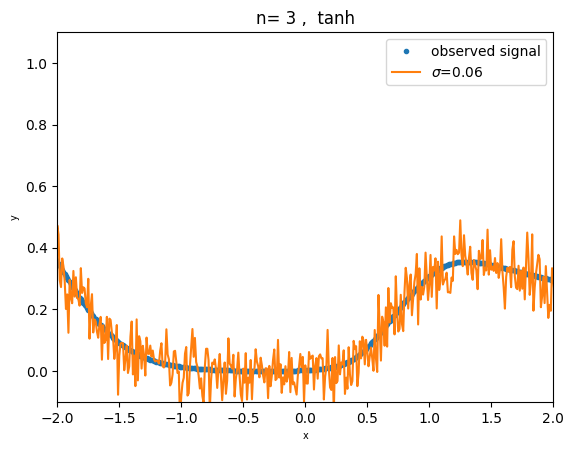

In [9]:
n=3
dn=d[d['rep']==n]
display(dn)

#Fonts and sizes                                                                                    
size_axis=7;size_ticks=6;size_title=5
line_w=1;marker_s=3 #width and marker size

plt.plot(dn.x1,dn.y,'.',label='observed signal')
plt.plot(dn.x1,dn.y_noise,label='$\sigma$=' + str(sigma))
plt.title('n= %d ,  %s'  %(n, function)) 
plt.xlabel('x',fontsize=size_axis);plt.ylabel('y',fontsize=size_axis)
plt.xlim(-2,2);plt.ylim(-0.1,1.1)
plt.legend(loc='best')

#Name_figure='nn_' + function + '_sigma_' + str(sigma) + '_n_' + str(n) + '_r_' + str(realization)
#plt.savefig('../results/' + Name_figure + '.png',dpi=300)